**Project Topic:** **Sentence Autocompletion using NLP and Deep Learning in Machine Learning**

**Project Overview:**
The project aims to develop a machine learning system that can predict
and generate the next words or phrases in each sentence using natural
language processing (NLP) techniques. The system will utilize deep
learning algorithms to analyse and understand the context of the input
sentence and provide accurate and contextually relevant suggestions for
completing the sentence.

**LSTM MODEL:** LSTMs are long short-term memory networks that use (ANN) artificial neural networks in the field of artificial intelligence (AI) and deep learning. In contrast to normal feed-forward neural networks, also known as recurrent neural networks, these networks feature feedback connections.

**GRU (Gated Recurrent Unit) Model:**
GRU is a type of recurrent neural network (RNN) architecture.
It is designed to address the vanishing gradient problem that occurs in traditional RNNs.
GRU cells have two gates: an update gate and a reset gate.
The update gate controls how much of the previous hidden state should be retained, while the reset gate determines how much of the new input should be incorporated.
GRUs are computationally efficient and perform well on sequence-based tasks.

**CNN (Convolutional Neural Network) Model:**
CNNs are primarily used for image recognition and computer vision tasks.
They consist of convolutional layers that apply filters (kernels) to input data, capturing local patterns.
CNNs automatically learn hierarchical features from raw pixel values.
Max-pooling layers downsample the feature maps, reducing spatial dimensions.
Fully connected layers at the end of the network make predictions based on the learned features.

**SimpleRNN**: SimpleRNN (Simple Recurrent Neural Network) is a type of recurrent neural network (RNN) architecture that is used for sequential data processing tasks. Unlike more complex RNN variants like LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit), SimpleRNN has a simpler architecture and is computationally less expensive.

#The flow of program:

1. Loading data
2. Preprocessing the data and Tokenizing
3. Building and fitting the model on data
4. Evaluate the model
5. Predicting(Generating the text)
6. Saving the model for future applicaitons

**Importing Libraries**

In [ ]:
# Importing necessary libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GRU, Bidirectional, GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Dropout, SimpleRNN
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

**Loading the data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving terrible_old_man.txt to terrible_old_man.txt


In [ ]:
# reading the data from local google drive
with open('terrible_old_man.txt') as story:
  story_data = story.read()

**Data Preparation**

In [ ]:
# Data cleaning process
def clean_text(text):
  text = re.sub(r',', '', text)
  text = re.sub(r'\'', '',  text)
  text = re.sub(r'\"', '', text)
  text = re.sub(r'\(', '', text)
  text = re.sub(r'\)', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'“', '', text)
  text = re.sub(r'”', '', text)
  text = re.sub(r'’', '', text)
  text = re.sub(r'\.', '', text)
  text = re.sub(r';', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'\-', '', text)
  text = re.sub(r'-','',text)
  text = re.sub(r'!','',text)

  return text

In [ ]:
# cleaning the data
lower_data = story_data.lower()           # Converting the string to lower case to get uniformity

split_data = lower_data.splitlines()      # Splitting the data to get every line seperately but this will give the list of uncleaned data

print(split_data)

final = ''                                # initiating a argument with blank string to hold the values of final cleaned data

for line in split_data:
  line = clean_text(line)
  final += '\n' + line

print(final)

final_data = final.split('\n')       # splitting again to get list of cleaned and splitted data ready to be processed
print(final_data)

['‘the terrible old man’ ', 'by h. p lovecraft ', 'it was the design of angelo ricci and joe czanek and manuel silva to call ', 'on the terrible old man. this old man dwells all alone in a very ancient ', 'house on water street near the sea, and is reputed to be both ', 'exceedingly rich and exceedingly feeble; which forms a situation very ', 'attractive to men of the profession of messrs. ricci, czanek, and silva, for ', 'that profession was nothing less dignified than robbery. ', 'the inhabitants of kingsport say and think many things about the terrible ', 'old man which generally keep him safe from the attention of gentlemen ', 'like mr. ricci and his colleagues, despite the almost certain fact that he ', 'hides a fortune of indefinite magnitude somewhere about his musty and ', 'venerable abode. he is, in truth, a very strange person, believed to have ', 'been a captain of east india clipper ships in his day; so old that no one ', 'can remember when he was young, and so taciturn tha

In [ ]:
# Instantiating the Tokenizer
max_vocab = 1000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(final_data)

In [ ]:
# Getting the total number of words of the data.
word2idx = tokenizer.word_index
print(len(word2idx))
print(word2idx)
vocab_size = len(word2idx) + 1        # Adding 1 to the vocab_size because the index starts from 1 not 0. This will make it uniform when using it further
print(vocab_size)

507
{'the': 1, 'and': 2, 'in': 3, 'of': 4, 'a': 5, 'old': 6, 'to': 7, 'his': 8, 'he': 9, 'man': 10, 'that': 11, 'terrible': 12, 'they': 13, 'as': 14, 'very': 15, 'for': 16, 'not': 17, 'by': 18, 'ricci': 19, 'czanek': 20, 'is': 21, 'were': 22, 'at': 23, 'had': 24, 'was': 25, 'silva': 26, 'which': 27, 'mr': 28, 'so': 29, 'on': 30, 'street': 31, 'things': 32, 'about': 33, 'who': 34, 'with': 35, 'but': 36, 'all': 37, 'gate': 38, 'house': 39, 'be': 40, 'feeble': 41, 'messrs': 42, 'many': 43, 'like': 44, 'colleagues': 45, 'long': 46, 'or': 47, 'there': 48, 'more': 49, 'these': 50, 'their': 51, 'did': 52, 'heard': 53, 'joe': 54, 'this': 55, 'ancient': 56, 'profession': 57, 'than': 58, 'kingsport': 59, 'say': 60, 'certain': 61, 'have': 62, 'no': 63, 'one': 64, 'when': 65, 'aged': 66, 'are': 67, 'bottles': 68, 'little': 69, 'saw': 70, 'motorcar': 71, 'ship': 72, 'mans': 73, 'it': 74, 'angelo': 75, 'manuel': 76, 'call': 77, 'water': 78, 'exceedingly': 79, 'think': 80, 'him': 81, 'from': 82, 'alm

## Creating n-gram sequences from the sentences


In [ ]:
# We will turn the sentences to sequences line by line and create n_gram sequences

input_seq = []

for line in final_data:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_seq.append(n_gram_seq)

print(input_seq)

[[143, 12], [143, 12, 6], [143, 12, 6, 10], [18, 144], [18, 144, 145], [18, 144, 145, 146], [74, 25], [74, 25, 1], [74, 25, 1, 147], [74, 25, 1, 147, 4], [74, 25, 1, 147, 4, 75], [74, 25, 1, 147, 4, 75, 19], [74, 25, 1, 147, 4, 75, 19, 2], [74, 25, 1, 147, 4, 75, 19, 2, 54], [74, 25, 1, 147, 4, 75, 19, 2, 54, 20], [74, 25, 1, 147, 4, 75, 19, 2, 54, 20, 2], [74, 25, 1, 147, 4, 75, 19, 2, 54, 20, 2, 76], [74, 25, 1, 147, 4, 75, 19, 2, 54, 20, 2, 76, 26], [74, 25, 1, 147, 4, 75, 19, 2, 54, 20, 2, 76, 26, 7], [74, 25, 1, 147, 4, 75, 19, 2, 54, 20, 2, 76, 26, 7, 77], [30, 1], [30, 1, 12], [30, 1, 12, 6], [30, 1, 12, 6, 10], [30, 1, 12, 6, 10, 55], [30, 1, 12, 6, 10, 55, 6], [30, 1, 12, 6, 10, 55, 6, 10], [30, 1, 12, 6, 10, 55, 6, 10, 148], [30, 1, 12, 6, 10, 55, 6, 10, 148, 37], [30, 1, 12, 6, 10, 55, 6, 10, 148, 37, 149], [30, 1, 12, 6, 10, 55, 6, 10, 148, 37, 149, 3], [30, 1, 12, 6, 10, 55, 6, 10, 148, 37, 149, 3, 5], [30, 1, 12, 6, 10, 55, 6, 10, 148, 37, 149, 3, 5, 15], [30, 1, 12, 6, 1

In [ ]:
# Getting the maximum length of sequence for padding purpose
max_seq_length = max(len(x) for x in input_seq)
print(max_seq_length)

# Padding the sequences and converting them to array
input_seq = np.array(pad_sequences(input_seq, maxlen=max_seq_length, padding='pre'))
print(input_seq)

16
[[  0   0   0 ...   0 143  12]
 [  0   0   0 ... 143  12   6]
 [  0   0   0 ...  12   6  10]
 ...
 [  0   0   0 ... 505   4   8]
 [  0   0   0 ...   4   8 506]
 [  0   0   0 ...   8 506 507]]


In [ ]:
# Taking xs and labels to train the model.

xs = input_seq[:, :-1]        # xs contains every word in sentence except the last one because we are using this value to predict the y value
labels = input_seq[:, -1]     # labels contains only the last word of the sentence which will help in hot encoding the y value in next step
print("xs: ",xs)
print("labels:",labels)

xs:  [[  0   0   0 ...   0   0 143]
 [  0   0   0 ...   0 143  12]
 [  0   0   0 ... 143  12   6]
 ...
 [  0   0   0 ...   0 505   4]
 [  0   0   0 ... 505   4   8]
 [  0   0   0 ...   4   8 506]]
labels: [ 12   6  10 ...   8 506 507]


In [ ]:
# The matrix is square matrix of the size of vocab_size. Each row will denote a label and it will have
# a single +ve value(i.e 1) for that label and other values will be zero.

ys = to_categorical(labels, num_classes=vocab_size)
print(ys)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


**Model Development**

**LSTM MODEL**

In [ ]:
# Create an LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, 124, input_length=max_seq_length-1))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(520, return_sequences=True))
lstm_model.add(Bidirectional(LSTM(340, return_sequences=True)))
lstm_model.add(GlobalMaxPooling1D())
lstm_model.add(Dense(1024, activation='relu'))
lstm_model.add(Dense(vocab_size, activation='softmax'))

In [ ]:
# Compile the LSTM model
lstm_model.compile(optimizer=Adam(lr=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [ ]:
#Training the LSTM model
lstm_history = lstm_model.fit(xs, ys, epochs=30)

Epoch 1/30
33/33 [==============================] - 23s 490ms/step - loss: 5.9012 - accuracy: 0.0540
Epoch 2/30
33/33 [==============================] - 16s 476ms/step - loss: 5.5698 - accuracy: 0.0587
Epoch 3/30
33/33 [==============================] - 16s 474ms/step - loss: 5.4818 - accuracy: 0.0597
Epoch 4/30
33/33 [==============================] - 17s 498ms/step - loss: 5.4768 - accuracy: 0.0644
Epoch 5/30
33/33 [==============================] - 17s 516ms/step - loss: 5.4625 - accuracy: 0.0549
Epoch 6/30
33/33 [==============================] - 16s 477ms/step - loss: 5.4325 - accuracy: 0.0606
Epoch 7/30
33/33 [==============================] - 16s 481ms/step - loss: 5.3589 - accuracy: 0.0530
Epoch 8/30
33/33 [==============================] - 16s 485ms/step - loss: 5.1743 - accuracy: 0.0634
Epoch 9/30
33/33 [==============================] - 16s 472ms/step - loss: 5.0179 - accuracy: 0.0653
Epoch 10/30
33/33 [==============================] - 15s 471ms/step - loss: 4.9208 - accura

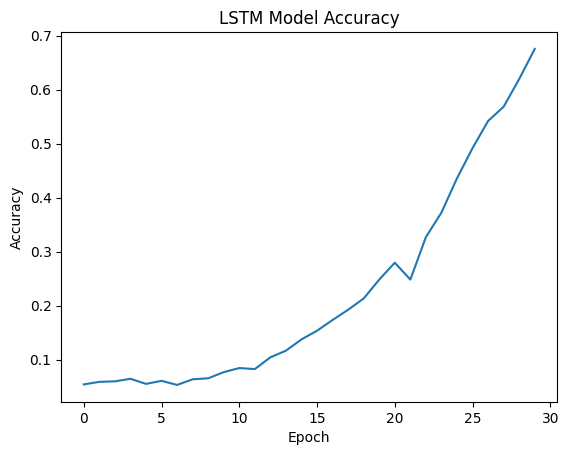

In [ ]:
# Evaluating the LSTM model on accuracy
plt.plot(lstm_history.history['accuracy'])
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Accuracy Score
print("LSTM Model Accuracy:", lstm_history.history['accuracy'][-1])

LSTM Model Accuracy: 0.6751893758773804


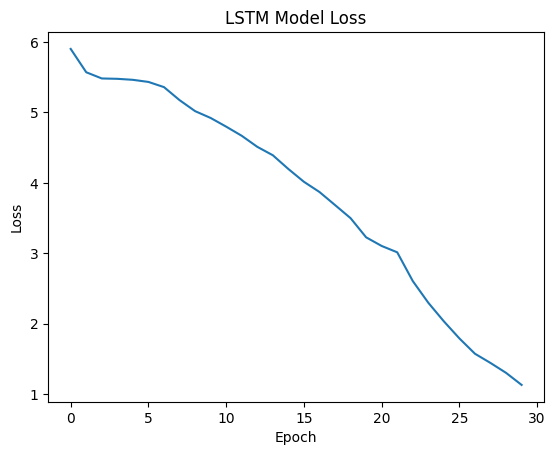

In [ ]:
# Evaluating the LSTM model on loss
plt.plot(lstm_history.history['loss'])
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
#Loss Score
print("LSTM Model Loss:", lstm_history.history['loss'][-1])

LSTM Model Loss: 1.1303950548171997


In [ ]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 124)           62992     
                                                                 
 dropout (Dropout)           (None, 15, 124)           0         
                                                                 
 lstm (LSTM)                 (None, 15, 520)           1341600   
                                                                 
 bidirectional (Bidirection  (None, 15, 680)           2341920   
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 680)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1024)              6

**GRU MODEL**

In [ ]:
# Create a GRU model
gru_model = Sequential()
gru_model.add(Embedding(vocab_size, 124, input_length=max_seq_length-1))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(520, return_sequences=True))
gru_model.add(Bidirectional(GRU(340, return_sequences=True)))
gru_model.add(GlobalMaxPooling1D())
gru_model.add(Dense(1024, activation='relu'))
gru_model.add(Dense(vocab_size, activation='softmax'))

In [ ]:
# Compile the GRU model
gru_model.compile(optimizer=Adam(lr=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
# Train the GRU model
gru_history = gru_model.fit(xs, ys, epochs=30)

Epoch 1/30
33/33 [==============================] - 18s 350ms/step - loss: 5.9685 - accuracy: 0.0634
Epoch 2/30
33/33 [==============================] - 13s 378ms/step - loss: 5.5506 - accuracy: 0.0587
Epoch 3/30
33/33 [==============================] - 14s 432ms/step - loss: 5.4749 - accuracy: 0.0625
Epoch 4/30
33/33 [==============================] - 13s 381ms/step - loss: 5.4094 - accuracy: 0.0559
Epoch 5/30
33/33 [==============================] - 12s 380ms/step - loss: 5.3303 - accuracy: 0.0559
Epoch 6/30
33/33 [==============================] - 12s 378ms/step - loss: 5.1456 - accuracy: 0.0653
Epoch 7/30
33/33 [==============================] - 13s 381ms/step - loss: 4.9174 - accuracy: 0.0729
Epoch 8/30
33/33 [==============================] - 12s 377ms/step - loss: 4.6787 - accuracy: 0.0956
Epoch 9/30
33/33 [==============================] - 13s 387ms/step - loss: 4.4515 - accuracy: 0.1080
Epoch 10/30
33/33 [==============================] - 12s 358ms/step - loss: 4.2328 - accura

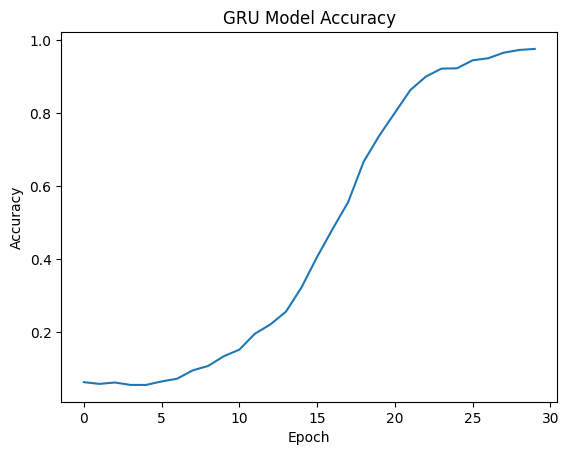

In [ ]:
# Evaluating the GRU model on accuracy
plt.plot(gru_history.history['accuracy'])
plt.title('GRU Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Accuracy score
print("GRU Model Accuracy:", gru_history.history['accuracy'][-1])

GRU Model Accuracy: 0.9763257503509521


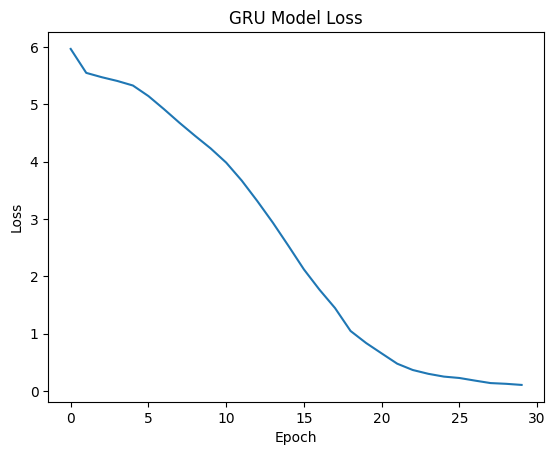

In [ ]:
# Evaluating the GRU model on loss
plt.plot(gru_history.history['loss'])
plt.title('GRU Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
#Loss Score
print("GRU Model Loss:", gru_history.history['loss'][-1])

GRU Model Loss: 0.10579653084278107


In [ ]:
gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 124)           62992     
                                                                 
 dropout_1 (Dropout)         (None, 15, 124)           0         
                                                                 
 gru (GRU)                   (None, 15, 520)           1007760   
                                                                 
 bidirectional_1 (Bidirecti  (None, 15, 680)           1758480   
 onal)                                                           
                                                                 
 global_max_pooling1d_1 (Gl  (None, 680)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_2 (Dense)             (None, 1024)             

**CNN MODEL**

In [ ]:
# Create a CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(vocab_size, 124, input_length=max_seq_length-1))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(1024, activation='relu'))
cnn_model.add(Dense(vocab_size, activation='softmax'))

In [ ]:
# Compile the CNN model
cnn_model.compile(optimizer=Adam(lr=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
# Train the CNN model
cnn_history = cnn_model.fit(xs, ys, epochs=30)

Epoch 1/30
33/33 [==============================] - 2s 23ms/step - loss: 5.9310 - accuracy: 0.0455
Epoch 2/30
33/33 [==============================] - 1s 22ms/step - loss: 5.5192 - accuracy: 0.0578
Epoch 3/30
33/33 [==============================] - 1s 22ms/step - loss: 5.4332 - accuracy: 0.0634
Epoch 4/30
33/33 [==============================] - 1s 22ms/step - loss: 5.3620 - accuracy: 0.0606
Epoch 5/30
33/33 [==============================] - 1s 31ms/step - loss: 5.2664 - accuracy: 0.0634
Epoch 6/30
33/33 [==============================] - 1s 33ms/step - loss: 5.1209 - accuracy: 0.0672
Epoch 7/30
33/33 [==============================] - 1s 34ms/step - loss: 4.9815 - accuracy: 0.0663
Epoch 8/30
33/33 [==============================] - 1s 30ms/step - loss: 4.8083 - accuracy: 0.0739
Epoch 9/30
33/33 [==============================] - 1s 21ms/step - loss: 4.6296 - accuracy: 0.0843
Epoch 10/30
33/33 [==============================] - 1s 22ms/step - loss: 4.4596 - accuracy: 0.1089
Epoch 11/

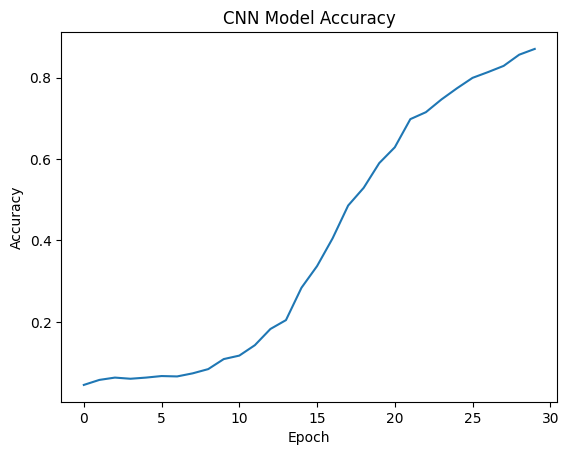

In [ ]:
# Evaluating the CNN model on accuracy
plt.plot(cnn_history.history['accuracy'])
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Accuracy Score
print("CNN Model Accuracy:", cnn_history.history['accuracy'][-1])

CNN Model Accuracy: 0.8702651262283325


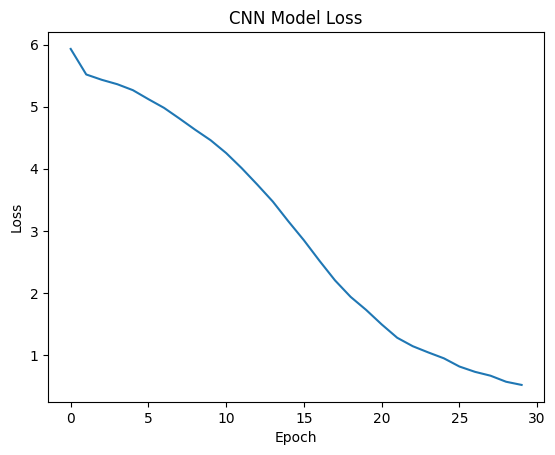

In [ ]:
# Evaluating the CNN model on loss
plt.plot(cnn_history.history['loss'])
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
#Loss Score
print("CNN Model Loss:", cnn_history.history['loss'][-1])

CNN Model Loss: 0.5167465806007385


In [ ]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 15, 124)           62992     
                                                                 
 dropout_2 (Dropout)         (None, 15, 124)           0         
                                                                 
 conv1d (Conv1D)             (None, 15, 64)            23872     
                                                                 
 max_pooling1d (MaxPooling1  (None, 7, 64)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 128)            24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 3, 128)            0         
 g1D)                                                 

**Simple RNN Model**

In [ ]:
simple_rnn_model = Sequential()
simple_rnn_model.add(Embedding(vocab_size, 124, input_length=max_seq_length-1))
simple_rnn_model.add(Dropout(0.2))
simple_rnn_model.add(SimpleRNN(256, return_sequences=True))
simple_rnn_model.add(GlobalMaxPooling1D())
simple_rnn_model.add(Dense(1024, activation='relu'))
simple_rnn_model.add(Dense(vocab_size, activation='softmax'))

In [ ]:
simple_rnn_model.compile(optimizer=Adam(lr=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
simple_rnn_history = simple_rnn_model.fit(xs, ys, epochs=30)

Epoch 1/30
33/33 [==============================] - 2s 31ms/step - loss: 5.9006 - accuracy: 0.0568
Epoch 2/30
33/33 [==============================] - 1s 31ms/step - loss: 5.5609 - accuracy: 0.0559
Epoch 3/30
33/33 [==============================] - 1s 30ms/step - loss: 5.5019 - accuracy: 0.0606
Epoch 4/30
33/33 [==============================] - 1s 32ms/step - loss: 5.4693 - accuracy: 0.0616
Epoch 5/30
33/33 [==============================] - 2s 48ms/step - loss: 5.4451 - accuracy: 0.0549
Epoch 6/30
33/33 [==============================] - 2s 52ms/step - loss: 5.4083 - accuracy: 0.0653
Epoch 7/30
33/33 [==============================] - 1s 35ms/step - loss: 5.3842 - accuracy: 0.0663
Epoch 8/30
33/33 [==============================] - 1s 30ms/step - loss: 5.2622 - accuracy: 0.0672
Epoch 9/30
33/33 [==============================] - 1s 31ms/step - loss: 5.1360 - accuracy: 0.0578
Epoch 10/30
33/33 [==============================] - 1s 31ms/step - loss: 4.9844 - accuracy: 0.0701
Epoch 11/

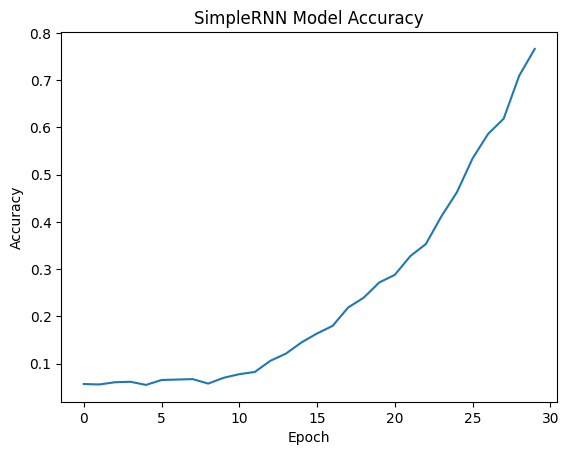

In [ ]:
# Evaluating the SimpleRNN model on accuracy
plt.plot(simple_rnn_history.history['accuracy'])
plt.title('SimpleRNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Accuracy Score
print("SimpleRNN Model Accuracy:", simple_rnn_history.history['accuracy'][-1])

SimpleRNN Model Accuracy: 0.7660984992980957


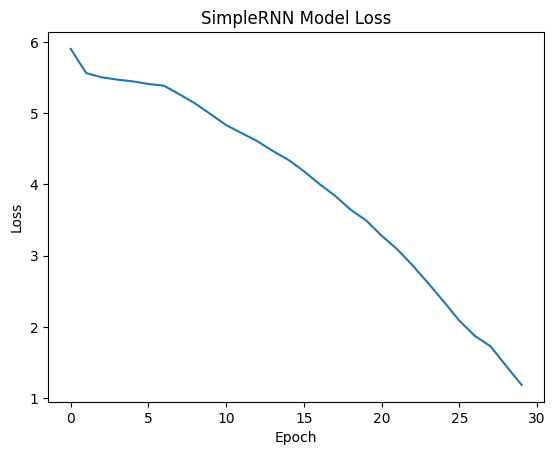

In [ ]:
# Evaluating the SimpleRNN model on loss
plt.plot(simple_rnn_history.history['loss'])
plt.title('SimpleRNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
#Loss Score
print("SimpleRNN Model Loss:", simple_rnn_history.history['loss'][-1])

SimpleRNN Model Loss: 1.1844384670257568


In [ ]:
simple_rnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 15, 124)           62992     
                                                                 
 dropout_3 (Dropout)         (None, 15, 124)           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 15, 256)           97536     
                                                                 
 global_max_pooling1d_2 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_6 (Dense)             (None, 1024)              263168    
                                                                 
 dense_7 (Dense)             (None, 508)               520700    
                                                      

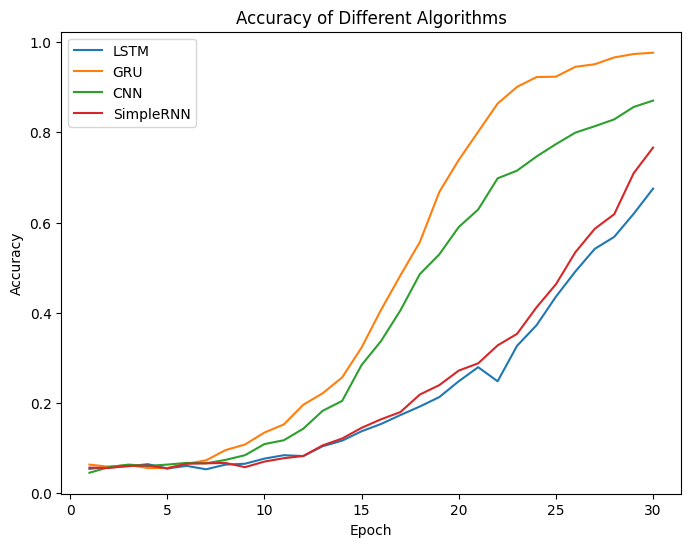

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the accuracy for each model
epochs = range(1, len(lstm_history.history['accuracy']) + 1)
ax.plot(epochs, lstm_history.history['accuracy'], label='LSTM')
ax.plot(epochs, gru_history.history['accuracy'], label='GRU')
ax.plot(epochs, cnn_history.history['accuracy'], label='CNN')
ax.plot(epochs, simple_rnn_history.history['accuracy'], label='SimpleRNN')

# Add labels and title
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Different Algorithms')

# Add legend
ax.legend()

# Show the plot
plt.show()

**Predictions**

In [ ]:
#Predicting the sentences
def predict_words(model, seed, no_words):
  for i in range(no_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=1)

    new_word = ''

    for word, index in tokenizer.word_index.items():
      if predicted == index:
        new_word = word
        break
    seed += " " + new_word
  print(seed)

In [ ]:
# Generating sentences using LSTM model
print("LSTM Model:")
seed_text = 'The old man dwells all alone'
next_words = 10
predict_words(lstm_model, seed_text, next_words)

LSTM Model:
1/1 [==============================] - 0s 113ms/step
The old man dwells all alone in a very ancient and no peculiar as to cutlasses


In [ ]:
# Generating sentences using GRU model
print("\nGRU Model:")
seed_text = 'Among the gnarled trees'
next_words = 10
predict_words(gru_model, seed_text, next_words)


GRU Model:
1/1 [==============================] - 0s 35ms/step
Among the gnarled trees they had more out of kingsport blood they were of


In [ ]:
# Generating sentences using CNN model
print("\nCNN Model:")
seed_text = 'Those who have watched the tall'
next_words = 5
predict_words(cnn_model, seed_text, next_words)



CNN Model:
1/1 [==============================] - 0s 35ms/step
Those who have watched the tall lean terrible old man in


In [ ]:
# Generating sentences using CNN model
print("\nSimple RNN Model:")
seed_text = 'He was by nature reserved,'
next_words = 10
predict_words(simple_rnn_model, seed_text, next_words)


Simple RNN Model:
1/1 [==============================] - 0s 37ms/step
He was by nature reserved, and when joe is and a exceptionally a who exceptionally


In [ ]:
# Saving the models
lstm_model.save('lstm_poem_generator.h5')
gru_model.save('gru_poem_generator.h5')
cnn_model.save('cnn_poem_generator.h5')
simple_rnn_model.save('simple_rnn_generator.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
